Introduction to Data Science - Project 1 - Harini Balaji - UID: U01950427

1) Prep the data in order to be ready to be fed to a model. Look for missing, null, NaN records.Find outliers. Transform data – all entries should be numeric.


In [ ]:
Step 1: Install the require libraries and import it

In [7]:
#Pandas - provides data structures like Series and DataFrames
import pandas as pd
#Numpy - support for arrays, matrices, and a variety of mathematical functions to operate on these data structures
import numpy as np
#Sweetviz - generates beautiful, high-density visualizations for a quick and easy exploration of your data
import sweetviz as sv

In [8]:
#matplotlib - provides a MATLAB-like interface for plotting
import matplotlib.pyplot as plt

In [9]:
#Seaborn() - provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
#Plotly.express() - allows you to generate complex plots with minimal code
import plotly.express as px

Step 2: Load the dataset (using pd.read_csv())

In [49]:
path='C:/Users/harin/OneDrive/Desktop/MS DS College stuffs/CS675 Intro To DS/Assignment 1/telco-customer-churn.csv'
teleco_data=pd.read_csv(path)

In [50]:
#Get the summary of the loaded dataset (which includes columns,count,data type,memory usage)
teleco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Step 3: Initial Data Inspection

View Data Structure: Use functions like .head(- used to quickly view the first few rows), .tail(-used to quickly view the last few rows), .info(- summary of loaded dataset), and .describe(- statistical summary of the numerical columns) ot get a sense of the data structure, types, and summary statistic

• Check Dimensions: Identify the number of rows and columns using ape, • Identify Missing Values: Use .isnull().sum() to check for missing values.

In [51]:
print("Print Head")
teleco_data.head()

Print Head


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [24]:
print("Print Tail")
teleco_data.tail()

Print Tail


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [25]:
print("Print Statistical data")
teleco_data.describe()

Print Statistical data


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [26]:
#.shape() - returns tuples which represents array
print(teleco_data.shape)

(7043, 21)


Checking for Missing Values (.isnull().sum())

In [27]:
teleco_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [52]:
#isnull.sum() - The isnull().sum() method in pandas is a useful way to identify and quantify missing values in a DataFrame
#.columns() - attribute of a DataFrame that returns the column labels of the DataFrame
#syntax for "For" loop - for variable in iterable:

teleco_data.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Find Outliers: Using IQR and Box plot visualization

In [53]:
#List data types

data_types = teleco_data.dtypes
print("Data types:",data_types)

Data types: customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [54]:
# Convert 'TotalCharges' to numeric,
teleco_data['TotalCharges'] = pd.to_numeric(teleco_data['TotalCharges'], errors='coerce')

#To find the ouliers: - to maintain the entries within range
for col in teleco_data.select_dtypes(include=['float64', 'int64']).columns.drop('SeniorCitizen'):
        Q1 = teleco_data[col].quantile(0.25)
        Q3 = teleco_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find outliers in the column
        outliers = teleco_data[(teleco_data[col] < lower_bound) | (teleco_data[col] > upper_bound)]
        print(f"Outliers in {col}: {len(outliers)}")

# Transform categorical variables to numeric - in order to have a ML friendly input
categorical_cols = teleco_data.select_dtypes(include=['object']).columns
teleco_data_encoded = pd.get_dummies(teleco_data, columns=categorical_cols, drop_first=True)

Outliers in tenure: 0
Outliers in MonthlyCharges: 0
Outliers in TotalCharges: 0


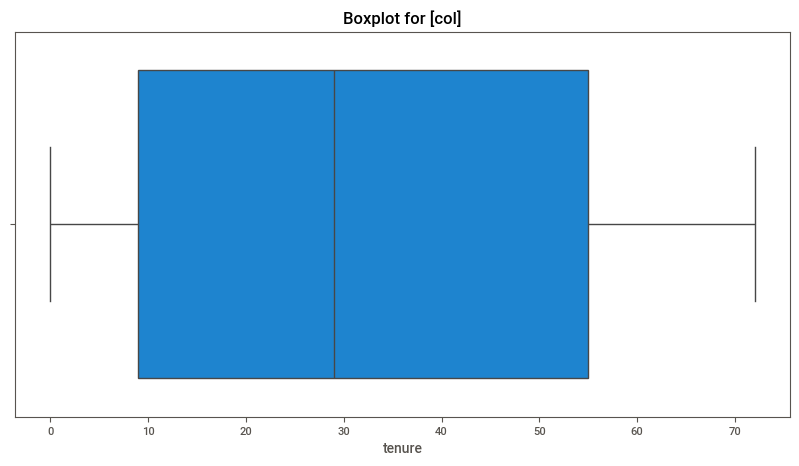

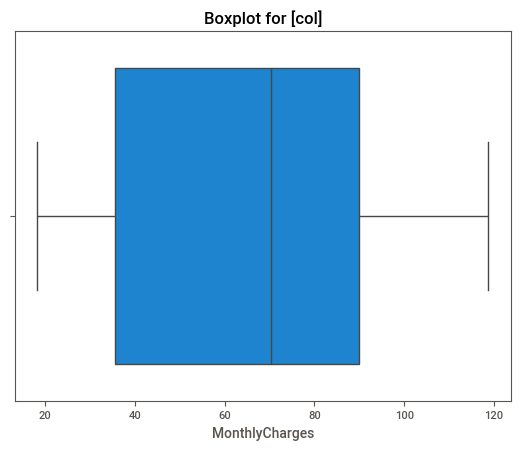

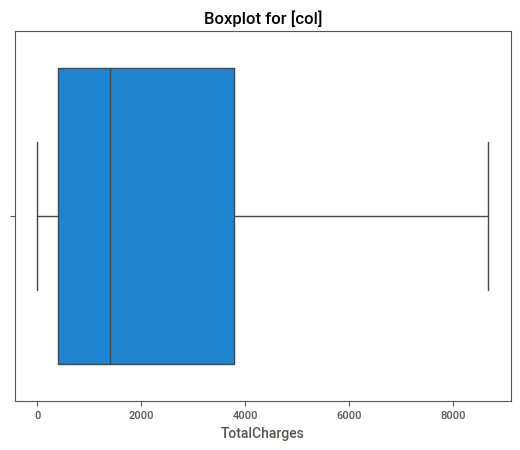

In [47]:
#using box plot visualization

plt.figure(figsize=(10, 5))
for col in teleco_data.select_dtypes(include=['float64','int64']).columns.drop('SeniorCitizen'):
    
    sns.boxplot(x=teleco_data[col])
    plt.title('Boxplot for [col]')
    plt.show()

In [46]:
teleco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int32  
 1   gender            7043 non-null   int32  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int32  
 4   Dependents        7043 non-null   int32  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int32  
 7   MultipleLines     7043 non-null   int32  
 8   InternetService   7043 non-null   int32  
 9   OnlineSecurity    7043 non-null   int32  
 10  OnlineBackup      7043 non-null   int32  
 11  DeviceProtection  7043 non-null   int32  
 12  TechSupport       7043 non-null   int32  
 13  StreamingTV       7043 non-null   int32  
 14  StreamingMovies   7043 non-null   int32  
 15  Contract          7043 non-null   int32  
 16  PaperlessBilling  7043 non-null   int32  


2)List all types of data, numeric, categorical, text.

In [55]:
print("Numeric_list =" ,teleco_data.select_dtypes(include=['float64', 'int64']).columns.tolist())

Numeric_list = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [56]:
print("Categorical_list =" ,teleco_data.select_dtypes(include=['object']).columns.tolist())

Categorical_list = ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [57]:
# Data Preprocessing
# Convert all categorical features to numeric
label_encoders = {}
for column in teleco_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    teleco_data[column] = le.fit_transform(teleco_data[column].astype(str))
    label_encoders[column] = le

teleco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int32  
 1   gender            7043 non-null   int32  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int32  
 4   Dependents        7043 non-null   int32  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int32  
 7   MultipleLines     7043 non-null   int32  
 8   InternetService   7043 non-null   int32  
 9   OnlineSecurity    7043 non-null   int32  
 10  OnlineBackup      7043 non-null   int32  
 11  DeviceProtection  7043 non-null   int32  
 12  TechSupport       7043 non-null   int32  
 13  StreamingTV       7043 non-null   int32  
 14  StreamingMovies   7043 non-null   int32  
 15  Contract          7043 non-null   int32  
 16  PaperlessBilling  7043 non-null   int32  


3) Perform EDA. Present dependencies and correlations among the various features in the data. List the most important variables (Feature Importance) that will affect the target label.

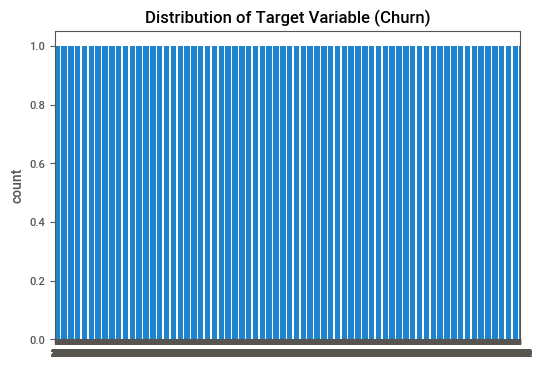

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of the target variable 'Churn'
plt.figure(figsize=(6, 4))
sns.countplot(teleco_data['Churn'])
plt.title("Distribution of Target Variable (Churn)")
plt.show()


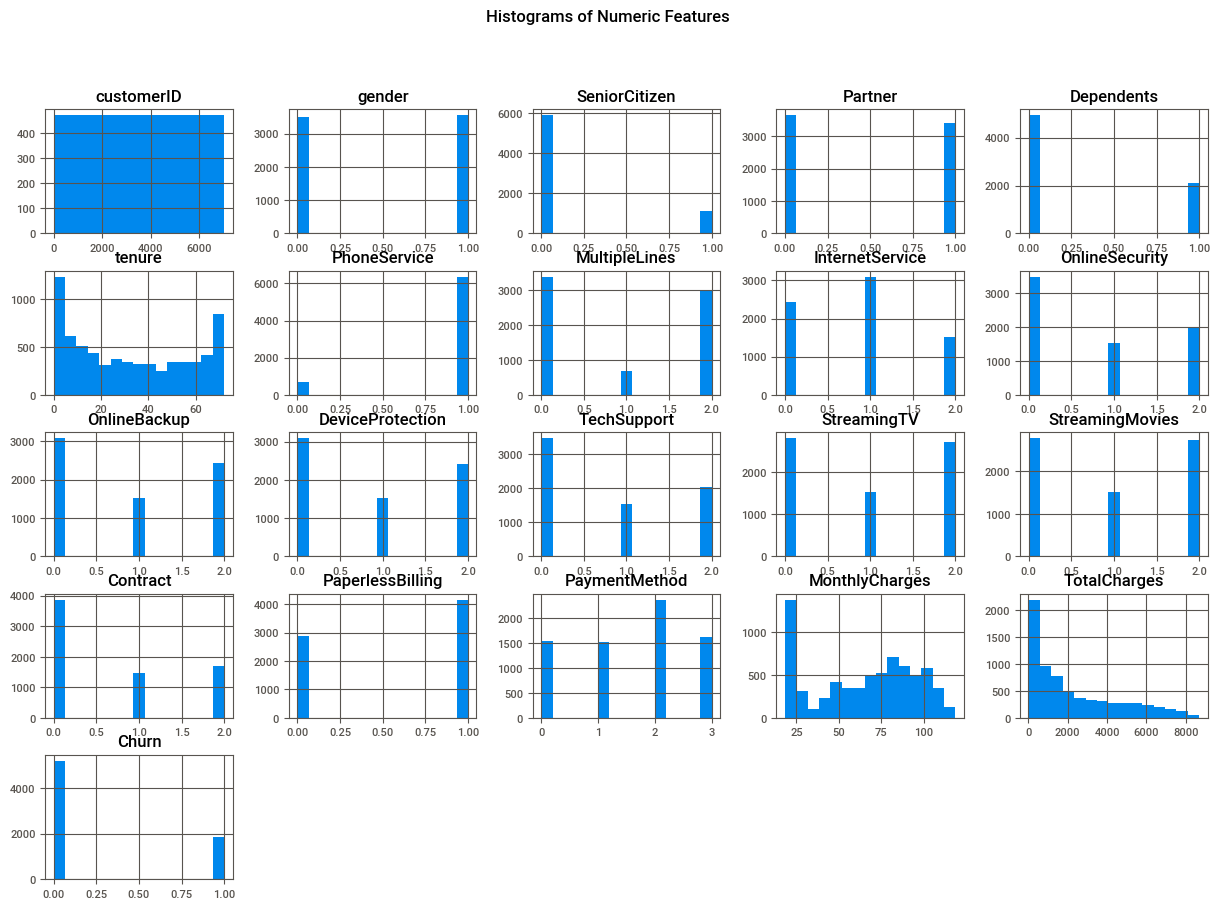

In [59]:
# Histograms for numeric features
teleco_data.hist(bins=15, figsize=(15, 10), layout=(5, 5))
plt.suptitle("Histograms of Numeric Features")
plt.show()

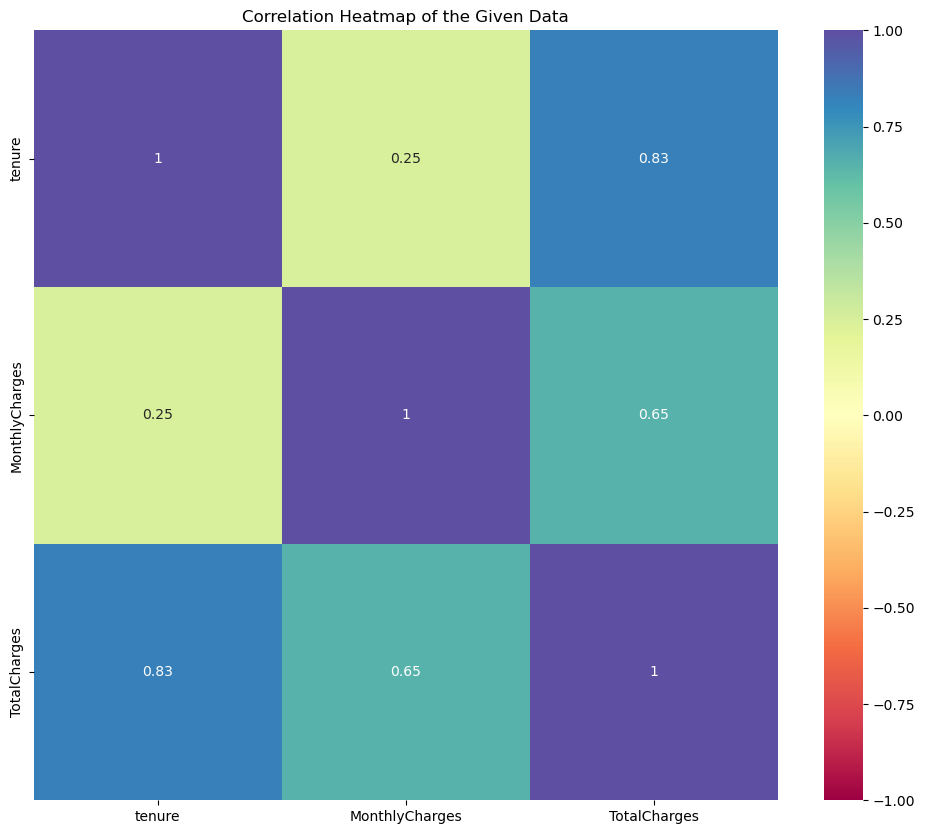

In [35]:
#This is done by using heatmap

# Select numerical columns and drop 'SeniorCitizen'
required_data = teleco_data.select_dtypes(include=['float64', 'int64']).drop('SeniorCitizen', axis=1)

# Compute the correlation matrix
corr_matrix = required_data.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='Spectral', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of the Given Data')
plt.show()

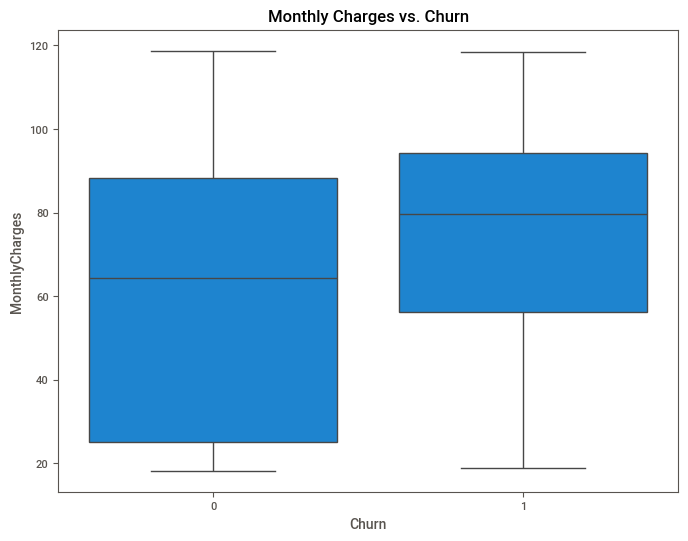

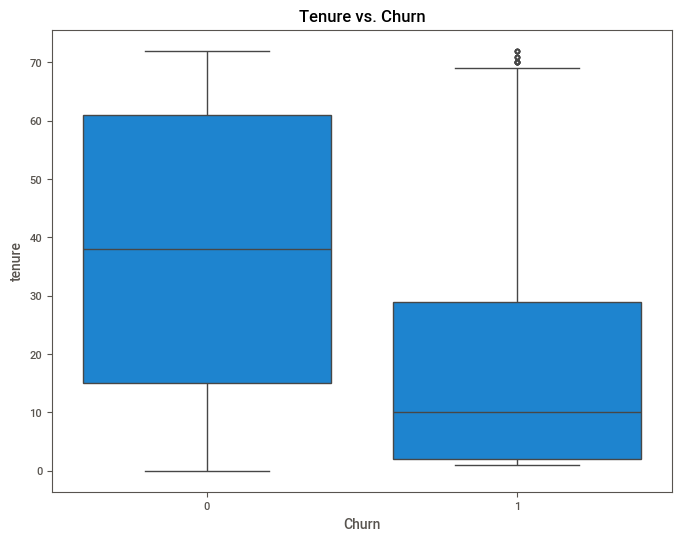

In [60]:
# Boxplot of MonthlyCharges by Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=teleco_data)
plt.title("Monthly Charges vs. Churn")
plt.show()

# Boxplot of Tenure by Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=teleco_data)
plt.title("Tenure vs. Churn")
plt.show()

Missing values found. Filling missing values...
Features shape: (7043, 19), Target shape: (7043,)
Top 10 Important Features (Mutual Information):
             feature  importance
14          Contract    0.091574
4             tenure    0.076971
8     OnlineSecurity    0.060872
11       TechSupport    0.059060
9       OnlineBackup    0.055694
7    InternetService    0.054400
16     PaymentMethod    0.047912
10  DeviceProtection    0.046260
17    MonthlyCharges    0.045334
18      TotalCharges    0.043268


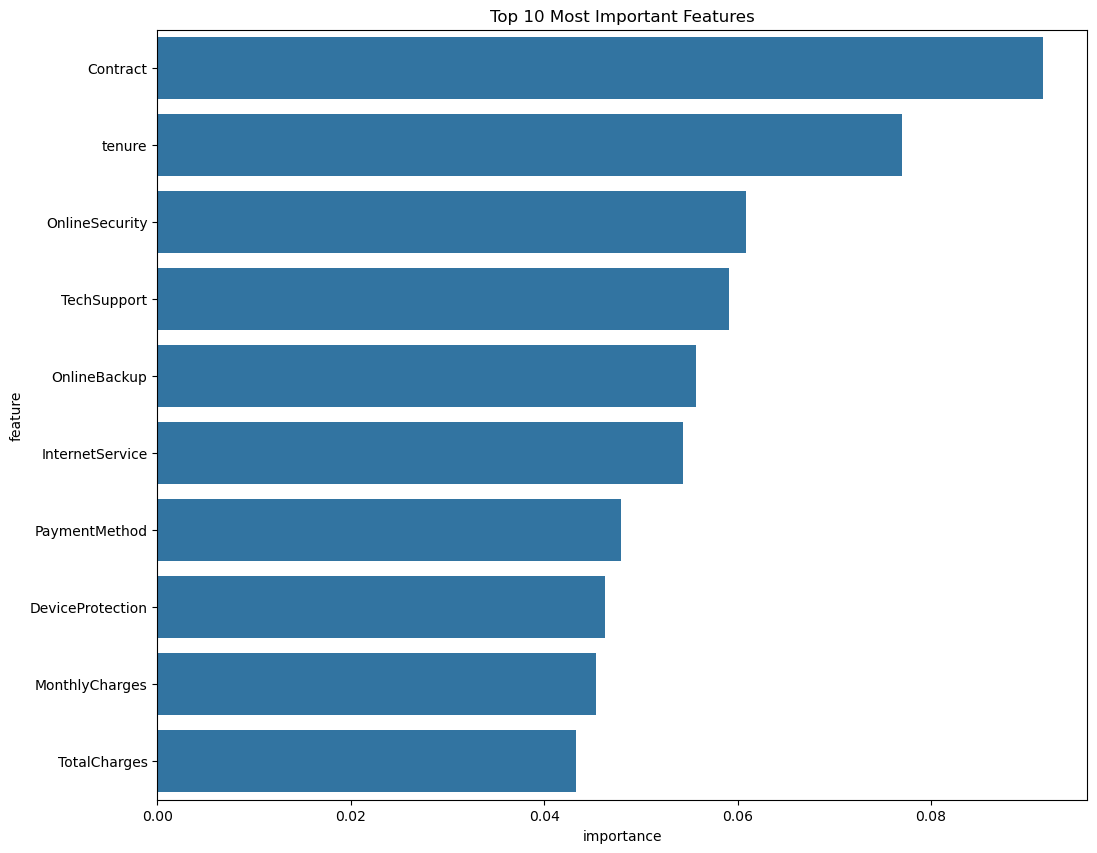

In [36]:
#Feature importance
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif

#Encoding categorical variables: identifies all object (string) columns and applies label encoding to each
le = LabelEncoder()
categorical_cols = teleco_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    teleco_data[col] = le.fit_transform(teleco_data[col])


# Check for missing values
if teleco_data.isnull().sum().any():
    print("Missing values found. Filling missing values...")
    teleco_data.fillna(0, inplace=True)

#Preparing and seperating features and target
X = teleco_data.drop(['Churn', 'customerID'], axis=1)
y = teleco_data['Churn']

# Check shapes of X and y
print(f"Features shape: {X.shape}, Target shape: {y.shape}")

#Calculating Mutual Information:
mi_scores = mutual_info_classif(X, y, random_state=42)

#create feature importance
mi_feature_importance = pd.DataFrame({'feature': X.columns, 'importance': mi_scores})
mi_feature_importance = mi_feature_importance.sort_values('importance', ascending=False)

# Display top 10 most important features
print("Top 10 Important Features (Mutual Information):")
print(mi_feature_importance.head(10))

#Plot feature importance
plt.figure(figsize=(12, 10))
sns.barplot(x='importance', y='feature', data=mi_feature_importance.head(10))
plt.title('Top 10 Most Important Features')
plt.show()

4) Split the dataset into training and test datasets (80/20 ratio). Using SweetViz’s ‘compare’command contrast the training vs test datasets on the target (‘churn’)

In [37]:
# Split the data into training and test sets (80/20 ratio)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Combine feature and target
train_teleco_data = pd.concat([X_train, y_train], axis=1)
test_teleco_data = pd.concat([X_test, y_test], axis=1)

In [38]:
# Print results by checking the percentage of train and test data:
train_size = len(train_teleco_data)  # Get the number of rows 
test_size = len(test_teleco_data)
total_size = train_size + test_size
train_percentage = (train_size / total_size) * 100
test_percentage = (test_size / total_size) * 100

print(f"Training data size: {train_size} ({train_percentage:.2f}%)")
print(f"Test data size: {test_size} ({test_percentage:.2f}%)")

Training data size: 5634 (79.99%)
Test data size: 1409 (20.01%)


In [39]:
#Create sweetviz report:
sv_compare = sv.compare([train_teleco_data, "Training"], [test_teleco_data, "Test"], "Churn")
sv_compare.show_html('sweetviz_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


5) State limitations/issues (if any) with the given dataset.

In [3]:
print("Limitations/Issues:")
print("1. Timeperiod is not provided: The dataset doesn't provide information about when the data was collected.")
print("2. Furthur more data which involves changes in target data can be provided")

Limitations/Issues:
1. Timeperiod is not provided: The dataset doesn't provide information about when the data was collected.
2. Furthur more data which involves changes in target data can be provided


In [40]:
# Import necessary libraries
import pandas as pd
from ydata_profiling import ProfileReport

# Assuming train_teleco_data and test_teleco_data are already defined
# Example for splitting (if not done already)
# train_teleco_data, test_teleco_data = train_test_split(df_cleaned, test_size=0.2, random_state=42)

# Generate Profiling Report for Training Dataset
print("\nGenerating Profiling Report for Training Dataset...")
train_profile = ProfileReport(train_teleco_data, title='Training Dataset Profiling Report', explorative=True)
train_profile.to_file("training_profile_report.html")
print("Training Dataset Profiling Report Generated: 'training_profile_report.html'")

# Generate Profiling Report for Testing Dataset
print("\nGenerating Profiling Report for Testing Dataset...")
test_profile = ProfileReport(test_teleco_data, title='Testing Dataset Profiling Report', explorative=True)
test_profile.to_file("testing_profile_report.html")
print("Testing Dataset Profiling Report Generated: 'testing_profile_report.html'")

# Optionally, open the HTML files to review them manually



Generating Profiling Report for Training Dataset...


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\harin\anaconda3\Lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 9 ... 9 9 9]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
C:\Users\harin\anaconda3\Lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 9 ... 9 0 0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
C:\Users\harin\anaconda3\Lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[9 0 0 ... 9 0 0]' has dt

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Training Dataset Profiling Report Generated: 'training_profile_report.html'

Generating Profiling Report for Testing Dataset...


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\harin\anaconda3\Lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 9 0 ... 9 0 9]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
C:\Users\harin\anaconda3\Lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[9 0 9 ... 9 9 0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
C:\Users\harin\anaconda3\Lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 9 ... 9 9 9]' has dt

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Testing Dataset Profiling Report Generated: 'testing_profile_report.html'
